In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



In [2]:
# Load train data
train_data = pd.read_csv("/content/drive/MyDrive/Codeway datasets/Task 1/train_data.txt", delimiter=" ::: ", engine="python", header=None, names=["ID", "TITLE", "GENRE", "DESCRIPTION"])

# Load test data solution (ground truth labels)
test_solution = pd.read_csv("/content/drive/MyDrive/Codeway datasets/Task 1/test_data_solution.txt", delimiter=" ::: ", engine="python", header=None, names=["ID", "TITLE", "GENRE", "DESCRIPTION"])



In [3]:
# Data preprocessing
# Handling missing values
train_data.fillna("", inplace=True)



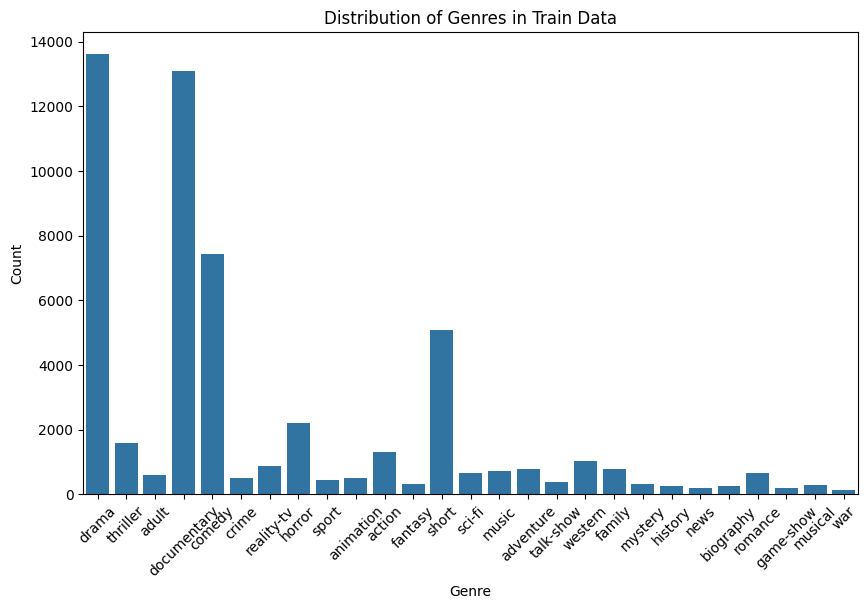

In [4]:
# Plotting distribution of genres in train data
plt.figure(figsize=(10, 6))
sns.countplot(x='GENRE', data=train_data)
plt.title('Distribution of Genres in Train Data')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [5]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as per your data size
tfidf_matrix = tfidf_vectorizer.fit_transform(train_data['DESCRIPTION'])



In [6]:
# Splitting into train and test sets
X_train, X_val, y_train, y_val = train_test_split(tfidf_matrix, train_data['GENRE'], test_size=0.2, random_state=42)



In [7]:
# Model training
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)



SVC(kernel='linear')

In [8]:
   # Model evaluation
val_predictions = svm_model.predict(X_val)
accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", accuracy)



Validation Accuracy: 0.5925481877709121


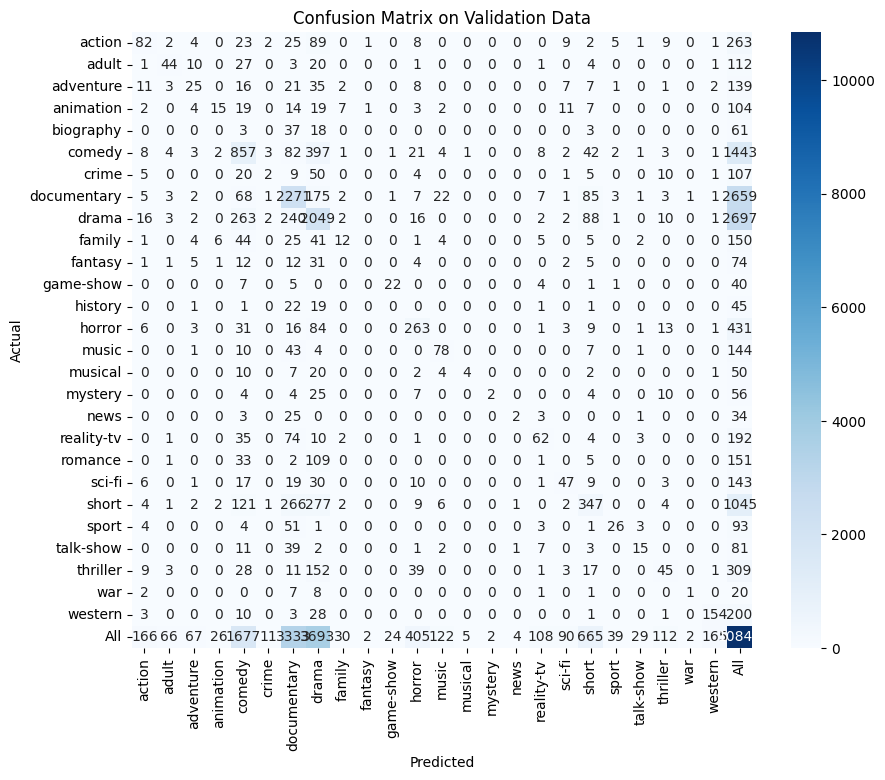

In [9]:
# Plotting confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pd.crosstab(y_val, val_predictions, rownames=['Actual'], colnames=['Predicted'], margins=True), annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix on Validation Data')
plt.show()



In [10]:
# Final prediction on test data
test_predictions = svm_model.predict(tfidf_vectorizer.transform(test_solution['DESCRIPTION']))



In [11]:
# Evaluation with test data solution
actual_labels = test_solution["GENRE"]
test_accuracy = accuracy_score(actual_labels, test_predictions)
print("Test Accuracy:", test_accuracy)



Test Accuracy: 0.5873062730627306


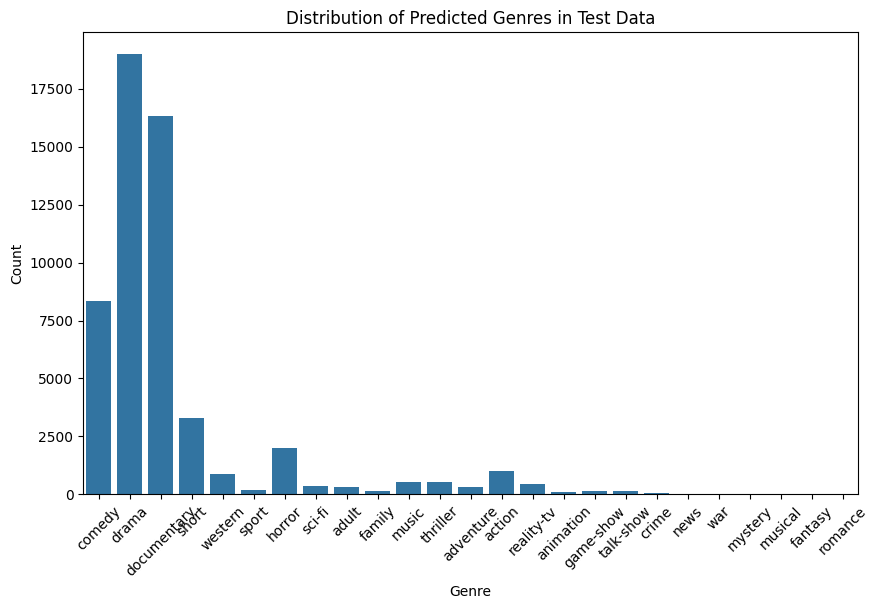

In [12]:
# Plotting distribution of predicted genres in test data
plt.figure(figsize=(10, 6))
sns.countplot(x=test_predictions)
plt.title('Distribution of Predicted Genres in Test Data')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
